## SENTIMENT ANALYSIS|

## IMPORTING MAJOR LIBRARIES

In [61]:
import numpy as np
import pandas as pd
import os 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk import word_tokenize

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aride\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
val = pd.read_csv(r"C:\module10\twitter_training.csv", header = None)
train = pd.read_csv(r"C:\module10\twitter_validation.csv", header = None)

In [21]:
train

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [23]:
train.columns = ['id', 'information', 'type', 'text']

In [25]:
train

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [27]:
val.columns = ['id', 'information', 'type', 'text']

In [29]:
val

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [31]:
train_data = train
val_data = val

In [65]:
train_data['lower'] = train_data.text.str.lower()

In [67]:
train

,id,information,type,text,lower
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news - amazon boss jeff bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,@microsoft why do i pay for word when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...","csgo matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,⭐️ toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,this is actually a good move tot bring more vi...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought a fraction of microsoft today. small wins.


In [69]:
train_data['lower'] = [str(data) for data in train_data.lower]
train_data

,id,information,type,text,lower
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news - amazon boss jeff bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,@microsoft why do i pay for word when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...","csgo matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,⭐️ toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,this is actually a good move tot bring more vi...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought a fraction of microsoft today. small wins.


In [71]:
train_data['lower'] = train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

In [73]:
train_data

,id,information,type,text,lower
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto is the arts and culture capital of c...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,this is actually a good move tot bring more vi...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked so it s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought a fraction of microsoft today small wins


In [77]:
val_data['lower'] = val_data.text.str.lower()
val_data['lower'] = [str(data) for data in val_data.lower]
val_data['lower'] = val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

In [79]:
val_data

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,just realized that the windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,just realized that my mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,just realized the windows partition of my mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,just realized between the windows partition of...


## PLOTTING THE FEATURES

In [90]:
word_cloud_text = ''.join(train_data[train_data['type'] == 'Positive'].lower)

In [92]:
wordcloud = WordCloud(
    max_font_size = 100,
    max_words = 100,
    background_color = 'black',
    scale = 10,
    width = 800,
    height = 800).generate(word_cloud_text)

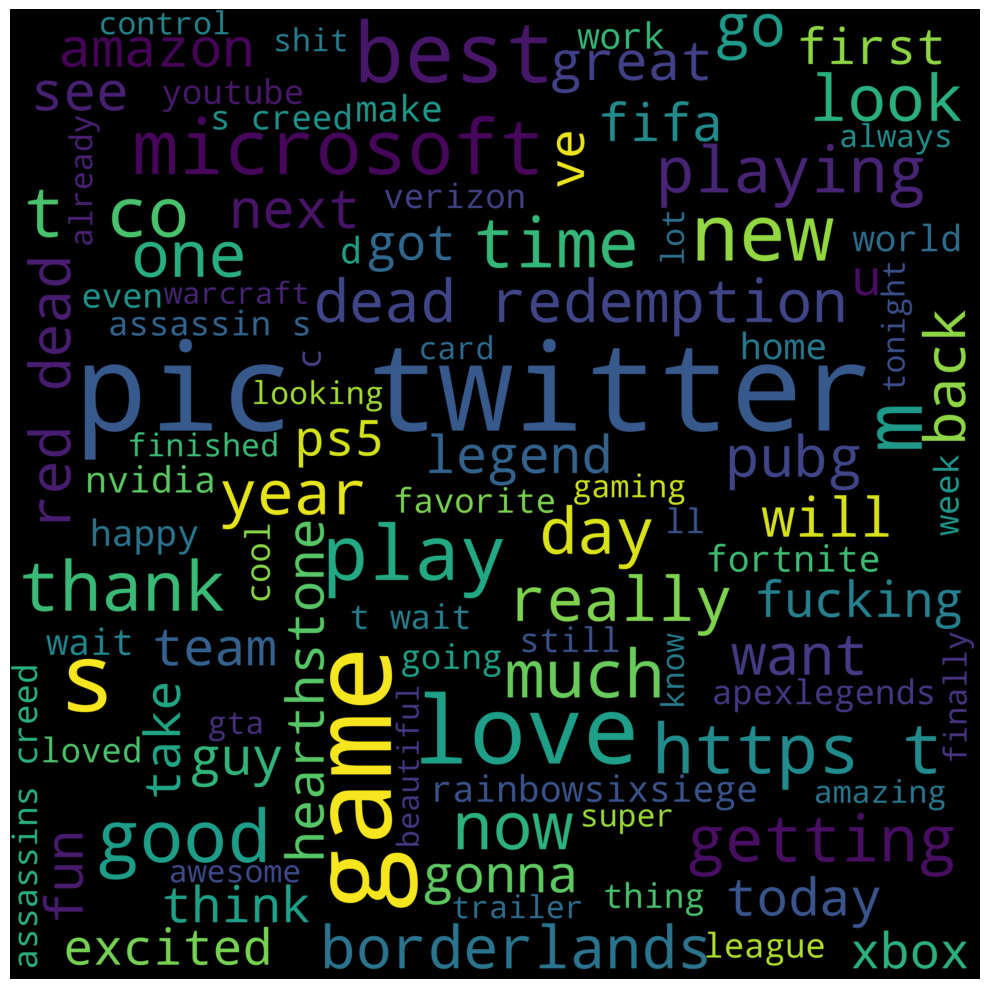

In [93]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

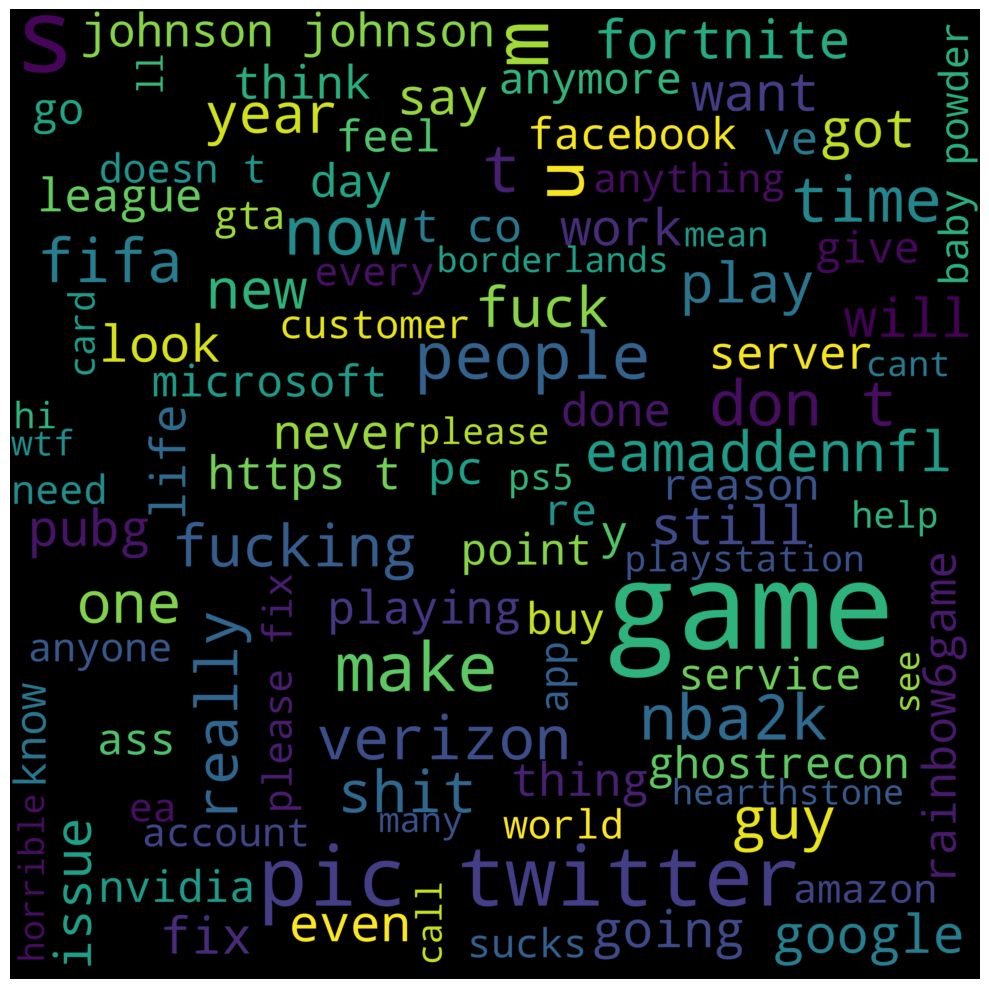

In [96]:
word_cloud_text = ''.join(train_data[train_data['type'] == 'Negative'].lower)
wordcloud = WordCloud(
    max_font_size = 100,
    max_words = 100,
    background_color = 'black',
    scale = 10,
    width = 800,
    height = 800).generate(word_cloud_text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

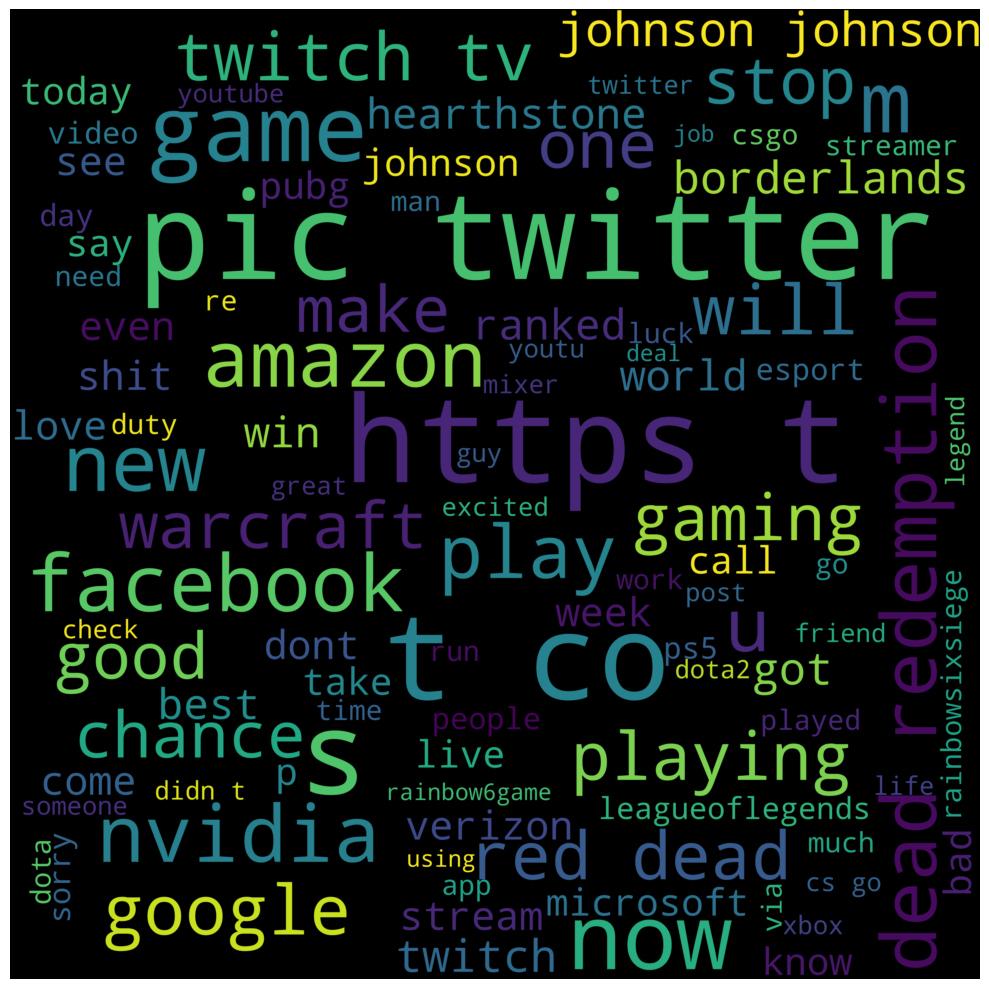

In [98]:
word_cloud_text = ''.join(train_data[train_data['type'] == 'Neutral'].lower)
wordcloud = WordCloud(
    max_font_size = 100,
    max_words = 100,
    background_color = 'black',
    scale = 10,
    width = 800,
    height = 800).generate(word_cloud_text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

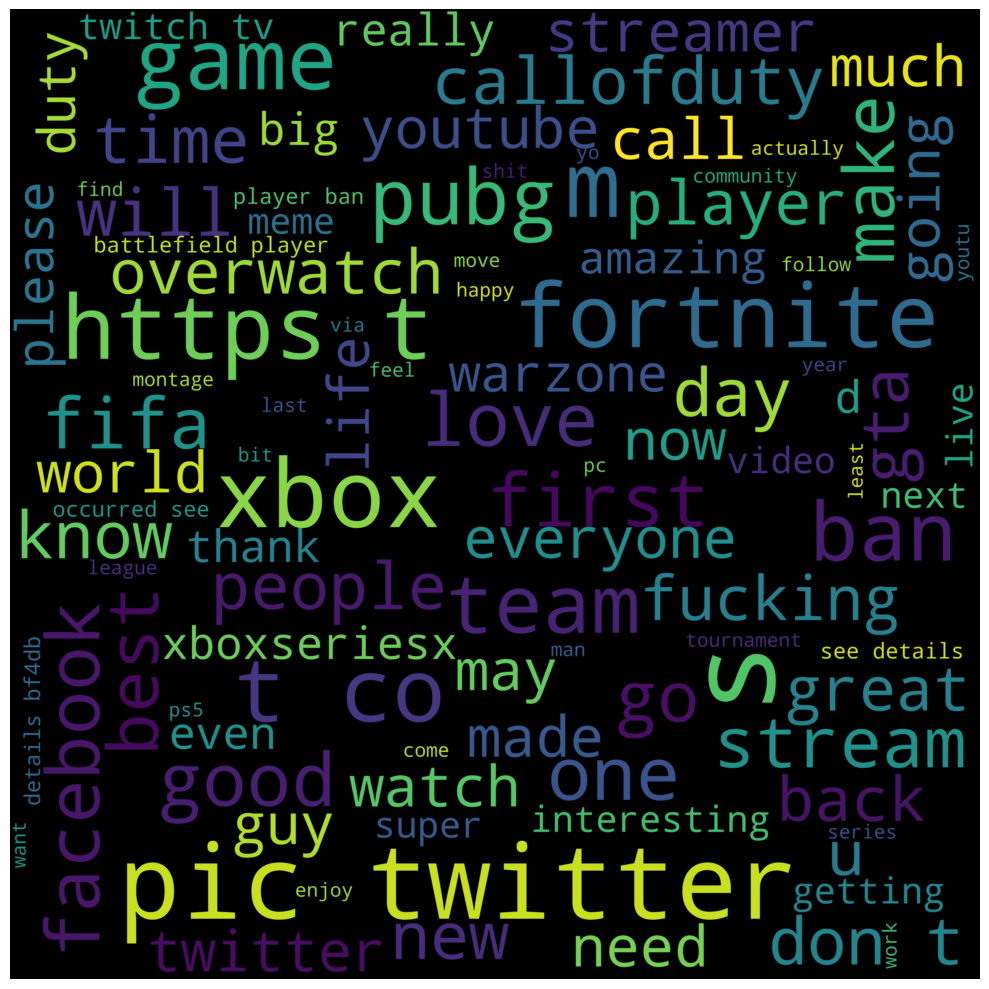

In [100]:
word_cloud_text = ''.join(train_data[train_data['type'] == 'Irrelevant'].lower)
wordcloud = WordCloud(
    max_font_size = 100,
    max_words = 100,
    background_color = 'black',
    scale = 10,
    width = 800,
    height = 800).generate(word_cloud_text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

## TEXT ANALYSIS

In [107]:
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
tokens_counter = [item for sublist in tokens_text for item in sublist]

In [109]:
len(set(tokens_counter))

5477

In [111]:
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  5477


In [113]:
tokens_text[1]

['bbc',
 'news',
 'amazon',
 'boss',
 'jeff',
 'bezos',
 'rejects',
 'claims',
 'company',
 'acted',
 'like',
 'a',
 'drug',
 'dealer',
 'bbc',
 'co',
 'uk',
 'news',
 'av',
 'busine']

In [158]:
from nltk.corpus import stopwords

stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['a', 'about', 'above', 'after', 'again']

## LOGISTIC REGRESSION MODEL

In [161]:
bow_counts = CountVectorizer(
    tokenizer = word_tokenize,
    stop_words = stop_words,
    token_pattern= None,
    ngram_range = (1, 1))

In [163]:
from sklearn.model_selection import train_test_split

In [165]:
reviews_train, reviews_test = train_test_split(train_data, test_size = 0.2, random_state = 0)

In [191]:
x_train_bow = bow_counts.fit_transform(reviews_train['lower'].str.lower())
x_test_bow = bow_counts.transform(reviews_test['lower'].str.lower())

In [193]:
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [195]:
y_test_bow.value_counts() / y_test_bow.shape[0]

type
Negative      0.295
Neutral       0.275
Positive      0.260
Irrelevant    0.170
Name: count, dtype: float64

In [197]:
model1 = LogisticRegression(C = 1, solver = 'liblinear', max_iter = 200)
model1.fit(x_train_bow, y_train_bow)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [199]:
test_pred = model1.predict(x_test_bow)

In [201]:
accuracy_score(y_test_bow, test_pred)

0.49

In [205]:
x_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

In [207]:
x_val_bow

<74682x4560 sparse matrix of type '<class 'numpy.int64'>'
	with 594951 stored elements in Compressed Sparse Row format>

In [209]:
val_res = model1.predict(x_val_bow)

In [211]:
accuracy_score(y_val_bow, val_res)

0.4954741437026325

In [215]:
bow_counts = CountVectorizer(
    tokenizer = word_tokenize,
    ngram_range = (1,4))

x_train_bow = bow_counts.fit_transform(reviews_train['lower'])
x_test_bow = bow_counts.transform(reviews_test['lower'])
x_val_bow = bow_counts.transform(val_data['lower'])

C:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [217]:
model2 = LogisticRegression(C = 0.9, solver = 'liblinear', max_iter = 1500)
model2.fit(x_train_bow, y_train_bow)
test_pred_2 = model2.predict(x_test_bow)

In [219]:
accuracy_score(y_test_bow, test_pred_2)

0.525